# Projet : Segmenter des clients d'un site de e-commerce : Notebook exploratoire

In [1]:
## Importation des librairies nécessaires
import pandas as pd
import numpy as np

In [2]:
## Importation des librairies supplémentaires utiles
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
## Chargement des données

customers = pd.read_csv("olist_customers_dataset.csv",sep=",",low_memory=False)
geolocation = pd.read_csv("olist_geolocation_dataset.csv",sep=",",low_memory=False)
items = pd.read_csv("olist_order_items_dataset.csv",sep=",",low_memory=False)
payments = pd.read_csv("olist_order_payments_dataset.csv",sep=",",low_memory=False)
reviews = pd.read_csv("olist_order_reviews_dataset.csv",sep=",",low_memory=False)
orders = pd.read_csv("olist_orders_dataset.csv",sep=",",low_memory=False)
products = pd.read_csv("olist_products_dataset.csv",sep=",",low_memory=False)
sellers = pd.read_csv("olist_sellers_dataset.csv",sep=",",low_memory=False)
category = pd.read_csv("product_category_name_translation.csv",sep=",",low_memory=False)

# Exploration des donées clients

In [4]:
# Les dimensions

customers.shape

(99441, 5)

In [5]:
# Première vue globale

customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [6]:
# Types des données

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
customers['customer_zip_code_prefix']

0        14409
1         9790
2         1151
3         8775
4        13056
         ...  
99436     3937
99437     6764
99438    60115
99439    92120
99440     6703
Name: customer_zip_code_prefix, Length: 99441, dtype: int64

''' Nous constatons qu'il n'y a pas de données manquantes '''

In [8]:
# Nombre d'occurences uniques

customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

# Exploration des donées de geolocalisation

In [9]:
# Les dimensions

geolocation.shape

(1000163, 5)

In [10]:
# Première vue globale

geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [11]:
# Types des données

geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


'''Nous n'observons pas de valeurs manquantes dans les données de géolocalisation'''

In [12]:
# Nombre d'occurences uniques

geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

# Exploration des donées des articles

In [13]:
# Les dimensions

items.shape

(112650, 7)

In [14]:
# Première vue globale

items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [15]:
# Types des données

items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


'''Aucune valeur manquante observée'''

In [16]:
# Nombre d'occurences uniques

items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

# Exploration des donées des payments

In [17]:
# Les dimensions

payments.shape

(103886, 5)

In [18]:
# Première vue globale

payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [19]:
# Types des données

payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


'''Aucune valeur manquante identifiée'''

In [20]:
# Nombre d'occurences uniques

payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

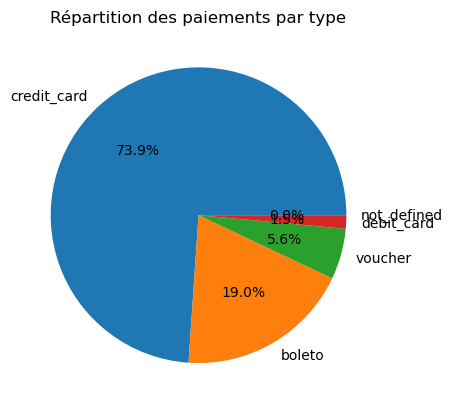

In [21]:
paymentType = payments["payment_type"].value_counts()

#Répartition des paiements par type
plt.pie(paymentType, labels=paymentType.index, autopct='%1.1f%%')
plt.title('Répartition des paiements par type')
plt.show()

# Exploration des donées des revues des commandes 

In [22]:
# Les dimensions

reviews.shape

(99224, 7)

In [23]:
# Première vue globale

reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [24]:
# Types des données

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
# Nombre d'occurences uniques

reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

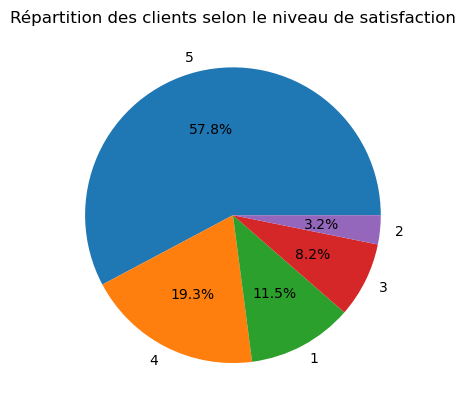

In [26]:
reviewScore = reviews["review_score"].value_counts()

#Répartition des clients en fonction du dégré de satisfaction
plt.pie(reviewScore, labels=reviewScore.index, autopct='%1.1f%%')
plt.title('Répartition des clients selon le niveau de satisfaction')
plt.show()

# Exploration des donées des commandes 

In [27]:
# Les dimensions

orders.shape

(99441, 8)

In [28]:
# Première vue globale

orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [29]:
# Types des données

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [30]:
# Nombre d'occurences uniques

orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

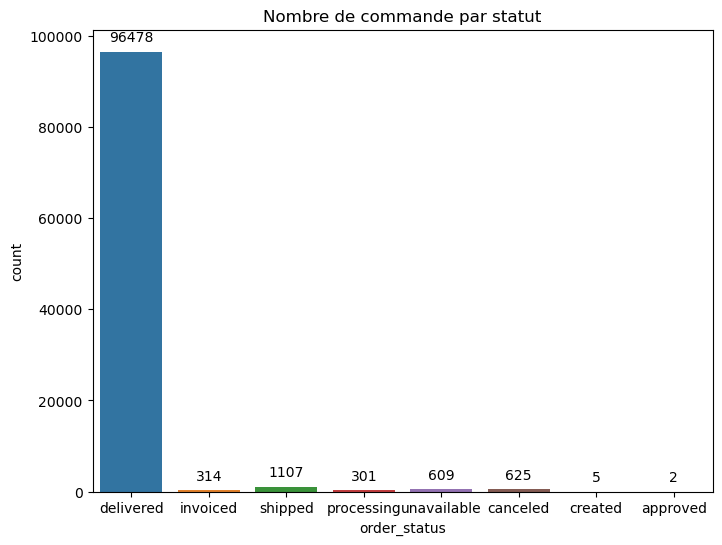

In [31]:
# Visualisation des commandes par statut
plt.figure(figsize=(8,6))
ax = sns.countplot(x="order_status", data=orders, hue ="order_status")
plt.title("Nombre de commande par statut")

for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Exploration des donées des produits

In [32]:
# Les dimensions

products.shape

(32951, 9)

In [33]:
# Première vue globale

products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [34]:
# Types des données

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [35]:
# Nombre d'occurences uniques

products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

# Exploration des donées des vendeurs

In [36]:
# Les dimensions

sellers.shape

(3095, 4)

In [37]:
# Première vue globale

sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [38]:
# Types des données

sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [39]:
# Nombre d'occurences uniques
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

# Exploration des donées des catégories de produits

In [40]:
# Les dimensions

category.shape

(71, 2)

In [41]:
# Première vue globale

category.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [42]:
# Types des données

category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [43]:
# Nombre d'occurences uniques
category.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

# Fusion des différentes données

In [44]:
df = pd.merge(orders, customers, on='customer_id', how='left')
df = df.merge(items, on='order_id', how='left')
df = df.merge(sellers, on='seller_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(category, on='product_category_name', how='left')
df = df.merge(payments, on='order_id', how='left')
df = df.merge(reviews, on='order_id', how='left')


In [45]:
# Les dimensions

df.shape

(119143, 40)

In [46]:
# Première vue globale
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

In [48]:
# Tableau des valeurs manquantes par variables après fusion

missing_values = df.isnull().sum()
missing_percent = round((missing_values/len(df))*100,3)
missing_table = pd.DataFrame({"Missing Values":missing_values,"Percentage":missing_percent})
print(missing_table)

                               Missing Values  Percentage
order_id                                    0       0.000
customer_id                                 0       0.000
order_status                                0       0.000
order_purchase_timestamp                    0       0.000
order_approved_at                         177       0.149
order_delivered_carrier_date             2086       1.751
order_delivered_customer_date            3421       2.871
order_estimated_delivery_date               0       0.000
customer_unique_id                          0       0.000
customer_zip_code_prefix                    0       0.000
customer_city                               0       0.000
customer_state                              0       0.000
order_item_id                             833       0.699
product_id                                833       0.699
seller_id                                 833       0.699
shipping_limit_date                       833       0.699
price         

<Axes: >

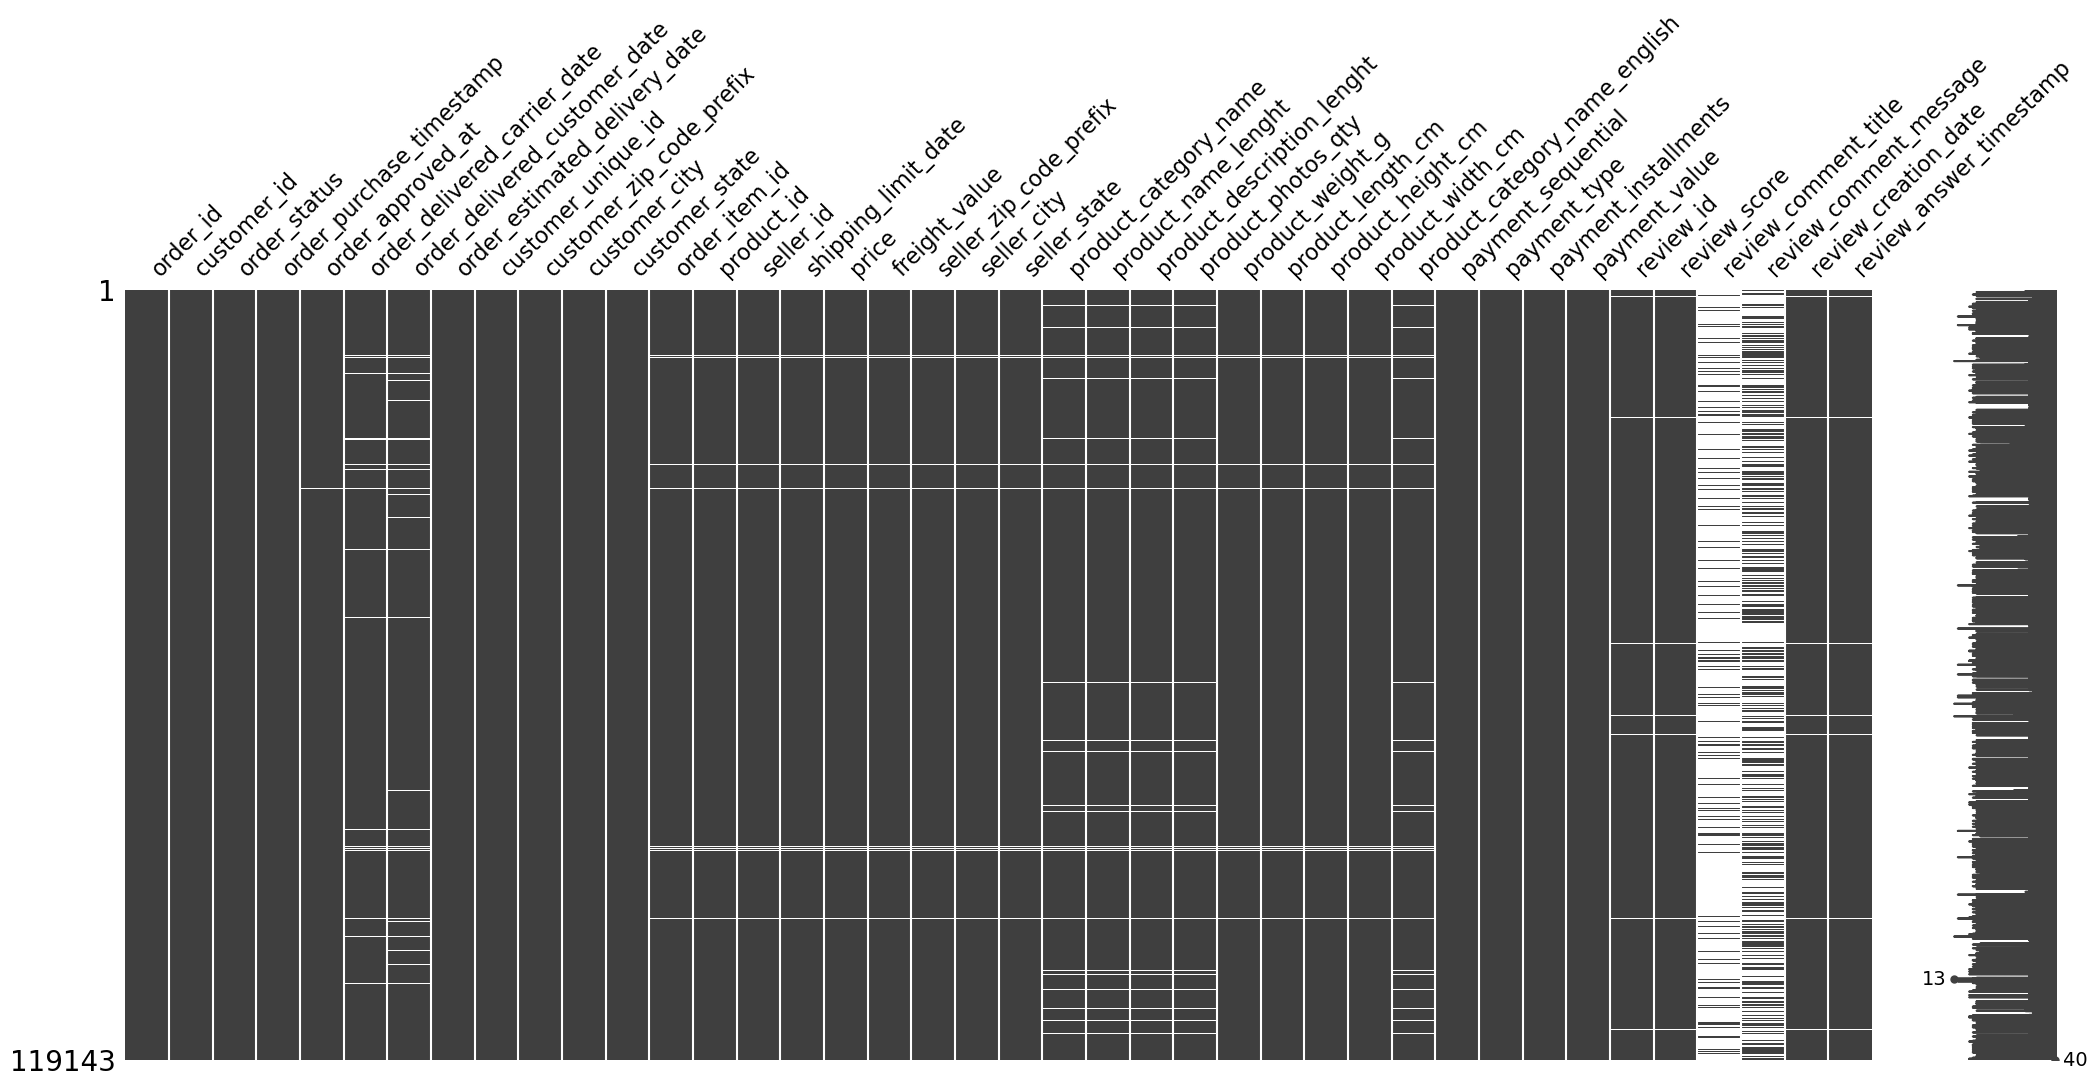

In [49]:
# Visualisation des valeurs manquantes avec missingno

msno.matrix(df)

In [50]:
# Nombre d'occurences uniques

df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
seller_zip_code_prefix            2246
seller_city                        611
seller_state                        23
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g         

In [51]:
# Suppression des doublons
df = df.drop_duplicates(subset=['order_id','product_id'], keep='first')

In [52]:
# 4. Conversion des dates en format datetime

from datetime import datetime

format_date = "%Y-%m-%d %H:%M:%S"
datetime_cols = ["order_purchase_timestamp","order_approved_at",
                     "order_delivered_carrier_date","order_delivered_customer_date",
                     "order_estimated_delivery_date","shipping_limit_date",
                     "review_creation_date","review_answer_timestamp"]
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format = format_date)

In [53]:
# Sélection des commandes livrées
df = df.loc[df["order_status"]=="delivered",:]

In [54]:
# Traitement des valeurs manquantes de df

mean_weight = df["product_weight_g"].mean()
mean_lenght = df["product_length_cm"].mean()
mean_height = df["product_height_cm"].mean()
mean_width = df["product_width_cm"].mean()

df["product_weight_g"].fillna(mean_weight, inplace=True)
df["product_length_cm"].fillna(mean_lenght, inplace=True)
df["product_height_cm"].fillna(mean_height, inplace=True)
df["product_width_cm"].fillna(mean_width, inplace=True)

In [55]:
payment_mode = df["payment_type"].mode()[0]

df["payment_type"].fillna(payment_mode,inplace=True)

In [56]:
# Concernant les valeurs manquantes au niveau des revue_score. Nous prenons le postulat qu'en général lorsqu'un client n'est pas satisfait il répond pour signifier son mécontentement et s'il est
#satifait il ne répond pas forcément. Nous allons par conséquent attribuer le score de 5 aux revues score manquants pour les commandes livrées.

df.loc[df["review_score"].isna(),"review_score"] = 5

In [57]:
# Tableau des valeurs manquantes par variables après fusion

missing_values = df.isnull().sum()
missing_percent = round((missing_values/len(df))*100,3)
missing_table = pd.DataFrame({"Missing Values":missing_values,"Percentage":missing_percent})
print(missing_table)

                               Missing Values  Percentage
order_id                                    0       0.000
customer_id                                 0       0.000
order_status                                0       0.000
order_purchase_timestamp                    0       0.000
order_approved_at                          14       0.014
order_delivered_carrier_date                2       0.002
order_delivered_customer_date               8       0.008
order_estimated_delivery_date               0       0.000
customer_unique_id                          0       0.000
customer_zip_code_prefix                    0       0.000
customer_city                               0       0.000
customer_state                              0       0.000
order_item_id                               0       0.000
product_id                                  0       0.000
seller_id                                   0       0.000
shipping_limit_date                         0       0.000
price         

In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [59]:
# Détermination pour chaque commandes de la différence de mois avec la première commande

purchaseDate = df["order_purchase_timestamp"].sort_values() # classement des commandes
df["first_purchase"] = purchaseDate.iloc[0] # Identification de la première commande
df["first_purchase"] = pd.to_datetime(df["first_purchase"], format = format_date)
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"], format = format_date)
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].astype('datetime64[ns]')
df["delta_purchase"] = df["order_purchase_timestamp"] - df["first_purchase"]
df["delta_purchase"] = (df["delta_purchase"].apply(lambda x: x.total_seconds())/86400)/30 # Nombre de mois entre la chaque commande et la première commande

In [60]:
# Période totale couverte par les commandes
purchaseDate = purchaseDate.astype('datetime64[ns]')
total_periode = round((((purchaseDate.iloc[-1] - purchaseDate.iloc[0]).total_seconds())/86400)/30, 2)
print("La période complète des commandes porte sur", total_periode,"mois.")

La période complète des commandes porte sur 23.77 mois.


In [61]:
df.loc[df["order_status"]=="delivered","delta_purchase"].describe()

count    100196.000000
mean         15.783244
std           5.095213
min           0.000000
25%          12.129798
50%          16.405292
75%          19.912417
max          23.770463
Name: delta_purchase, dtype: float64

In [62]:
# Calcul du total de chaque ligne de commande

df['orderLine_value'] = df['price'] + df['freight_value']

In [63]:
# Y a t-il un lien entre les délais de livraisons et les scores attribués par les clients ?

# Calucl du délai de livraison des commandes
delivery_time = df['order_delivered_customer_date'] - df['order_purchase_timestamp']

# Conversion en secondes
delivery_time_seconds = delivery_time.apply(lambda x: x.total_seconds())

# Création d'une nouvelle colonne contenant les délais de livraison de chaque commande en jours
df['delivery_time_days'] = round(delivery_time_seconds/86400,2)

In [64]:
df['delivery_time_days'].describe()

count    100188.000000
mean         12.495833
std           9.526436
min           0.530000
25%           6.730000
50%          10.180000
75%          15.590000
max         209.630000
Name: delivery_time_days, dtype: float64

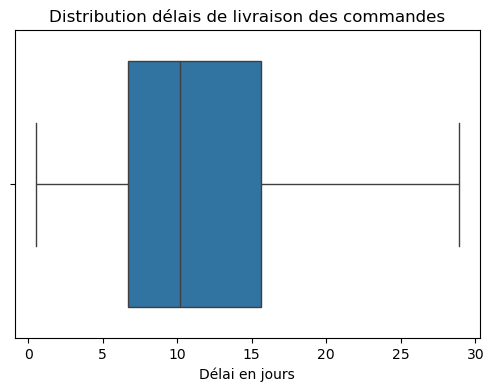

In [65]:
# Distribution de l'ensemble des délais de livraison pour l'ensemble des commandes
plt.figure(figsize=(6,4))
sns.boxplot(df['delivery_time_days'], orient='h', showfliers=False)
plt.xlabel('Délai en jours')
plt.title('Distribution délais de livraison des commandes')
plt.show()

Entre l'achat et la livraison, le client attend en général en moyenne entre 7 et 16 jours.

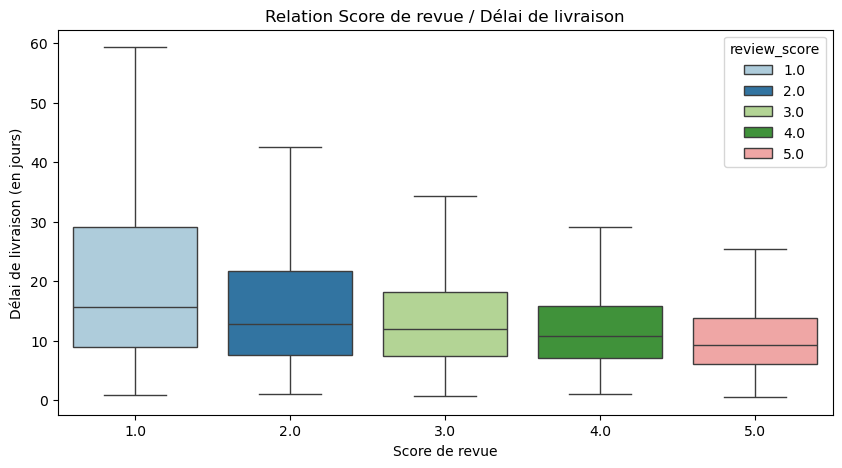

In [66]:
# Relation entre délai de livraison et score attribué 
plt.figure(figsize=(10,5))
sns.boxplot(x= 'review_score', y='delivery_time_days', data = df, showfliers=False, hue ='review_score', palette='Paired')
plt.xlabel('Score de revue')
plt.ylabel('Délai de livraison (en jours)')
plt.title('Relation Score de revue / Délai de livraison')
plt.show()

Nous observons que plus le délai de livraison est long, plus le score de revue attribué par le client est bas.
L'amélioration des délais de livraisons des commandes pourrait être un excellent moyen d'augmenter le niveau de satisfaction des clients.

In [67]:
# Calucl du délai transporteur des commandes
carrier_delay = df['order_delivered_carrier_date'] - df['order_approved_at']

# Conversion en secondes
carrier_delay_seconds = carrier_delay.apply(lambda x: x.total_seconds())

# Création d'une nouvelle colonne contenant les délais de transport de chaque commande en jours
df['carrier_delay_days'] = round(carrier_delay_seconds/86400,2)

In [68]:
# Calucl du délai d'approbation des commandes
approval_delay = df['order_approved_at'] - df['order_purchase_timestamp']

# Conversion en secondes
approval_delay_seconds = approval_delay.apply(lambda x: x.total_seconds())

# Création d'une nouvelle colonne contenant les délais d'approbation de chaque commande en jours
df['approval_delay_days'] = round(approval_delay_seconds/86400,2)

In [69]:
# Que pouvons-nous dire sur la fréquence des commandes selon les jours de la semaine et les heures de la journée?
# Pendant quels jours de la semaine et à quelles heures pouvons-nous réaliser des promotions ciblées par exemple?

# Eclatons la date d'achat afin de distingues les années, mois, jours et heures d'achats
df['weekday'] = df['order_purchase_timestamp'].dt.day_name() #obtenir les jours en lettre
df['year'] = df['order_purchase_timestamp'].dt.year #obtenons les années
df['monthday'] = df['order_purchase_timestamp'].dt.day #day of month
df['weekday'] = df['order_purchase_timestamp'].dt.weekday #jour de façon  chiffrée (0=Monday, 1=Tuesday,...)
df['month'] = df['order_purchase_timestamp'].dt.month #les mois
df['hour'] = df['order_purchase_timestamp'].dt.hour #les heures

In [70]:
day_hour = df.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'nombre'}).reset_index()

In [71]:
weekmap = {0:'Lun', 1:'Mar', 2:'Mer', 3:'Jeu', 4:'Ven', 5:'Sam', 6:'Dim'}
day_hour.weekday = day_hour.weekday.map(weekmap)
day_hour.head()

,weekday,hour,nombre
0,Lun,0,331
1,Lun,1,137
2,Lun,2,67
3,Lun,3,35
4,Lun,4,21


In [72]:
day_hour=day_hour.pivot(index = 'weekday', columns = 'hour', values = 'nombre')

Text(0.5, 1.0, 'Volume des commandes par jour et par heure')

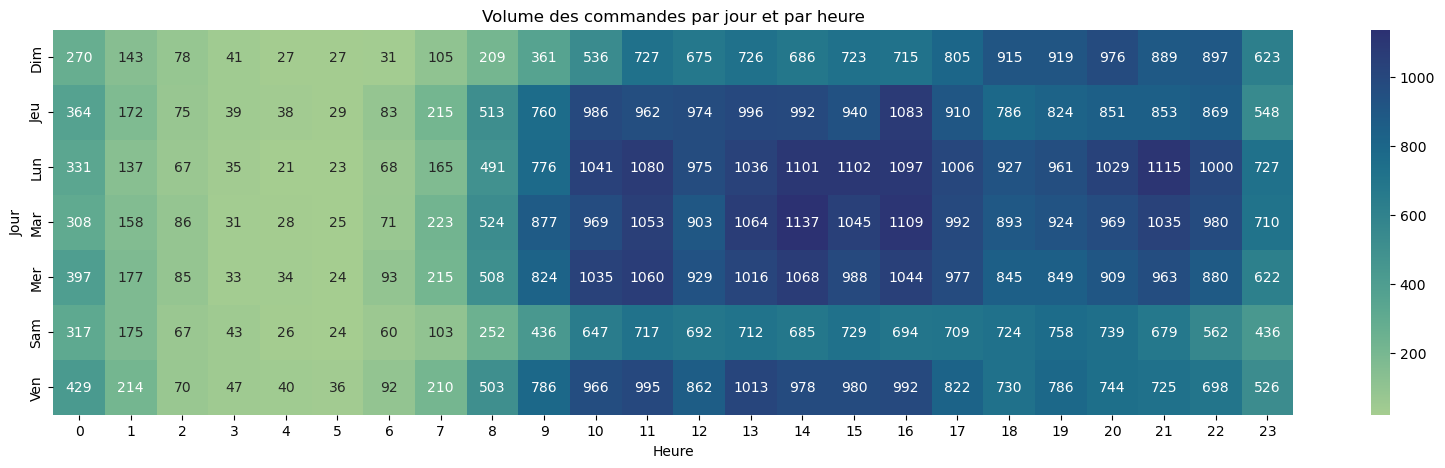

In [73]:
plt.figure(figsize=(20, 5))
ax=sns.heatmap(day_hour, annot = True, fmt = "d", cmap = "crest")
ax.set_xlabel("Heure")
ax.set_ylabel("Jour")
ax.set_title("Volume des commandes par jour et par heure")

'''Les périodes pour lesquelles nous avons le plus d'achat sont :
- Les Lun, Mar, Mer, Jeu et Ven de 10h à 17h
- Les Lun, Mar, Mer et Dim de 19h à 22h'''

# Construction des paramètres RFM

In [74]:
# Recency

# retrouvons la dernière date d'achat de toute les commandes
purchaseDate = df["order_purchase_timestamp"].sort_values() # Nous classons les dates d'achat
lastPurchaseDate = purchaseDate.iloc[-1] # nous retenons la dernière date de l'ensemble des commandes comme date de référence

recency = df.groupby(["customer_unique_id"]).agg({"order_purchase_timestamp":lambda x:((lastPurchaseDate - x.max()).days)})
recency

,order_purchase_timestamp
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,536
0000f6ccb0745a6a4b88665a16c9f078,320
0004aac84e0df4da2b147fca70cf8255,287
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446
fffea47cd6d3cc0a88bd621562a9d061,261
ffff371b4d645b6ecea244b27531430a,567


In [75]:
# Frequency

frequency = df.groupby(["customer_unique_id"])["order_id"].count()
frequency

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: order_id, Length: 93358, dtype: int64

In [76]:
# Monetary

monetary = df.groupby(["customer_unique_id"])["orderLine_value"].sum()
monetary

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      27.19
0000f46a3911fa3c0805444483337064      86.22
0000f6ccb0745a6a4b88665a16c9f078      43.62
0004aac84e0df4da2b147fca70cf8255     196.89
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    2067.42
fffea47cd6d3cc0a88bd621562a9d061      84.58
ffff371b4d645b6ecea244b27531430a     112.46
ffff5962728ec6157033ef9805bacc48     133.69
ffffd2657e2aad2907e67c3e9daecbeb      71.56
Name: orderLine_value, Length: 93358, dtype: float64

In [77]:
# Regroupement des paramètres RFM

RFM = pd.concat([recency,frequency,monetary], axis=1)

# Nous renommons les colonnes pour plus de clarté
RFM.rename(columns={"order_purchase_timestamp":"Recency","order_id":"Frequency","orderLine_value":"Monetary"}, inplace=True)

RFM

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,2067.42
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
ffff371b4d645b6ecea244b27531430a,567,1,112.46


In [78]:
# Tableau des valeurs manquantes par variables après fusion

missing_values = RFM.isnull().sum()
missing_percent = round((missing_values/len(RFM))*100,3)
missing_table = pd.DataFrame({"Missing Values":missing_values,"Percentage":missing_percent})
print(missing_table)

           Missing Values  Percentage
Recency                 0         0.0
Frequency               0         0.0
Monetary                0         0.0


In [79]:
RFM.describe()

,Recency,Frequency,Monetary
count,93358.000000,93358.000000,93358.000000
mean,236.941773,1.073245,154.354920
std,152.591453,0.328448,206.382393
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,59.780000
50%,218.000000,1.000000,101.635000
75%,345.000000,1.000000,171.840000
max,713.000000,15.000000,7571.630000


<Axes: xlabel='Recency', ylabel='Count'>

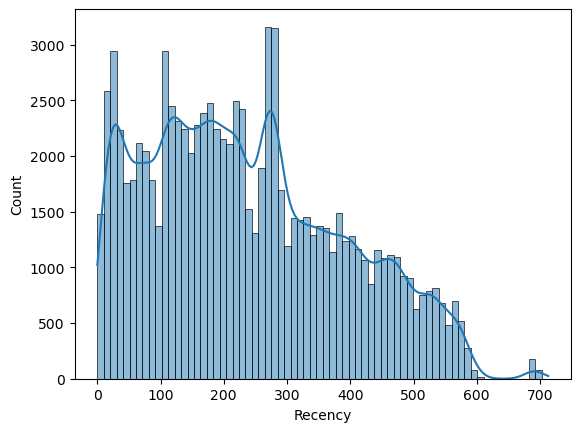

In [80]:
sns.histplot(data=RFM, x="Recency", kde=True)

<Axes: xlabel='Frequency', ylabel='Count'>

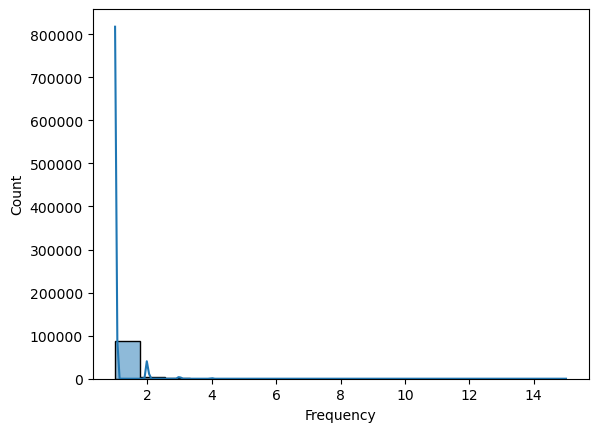

In [81]:
sns.histplot(data=RFM, x="Frequency", kde=True)

<Axes: xlabel='Monetary', ylabel='Count'>

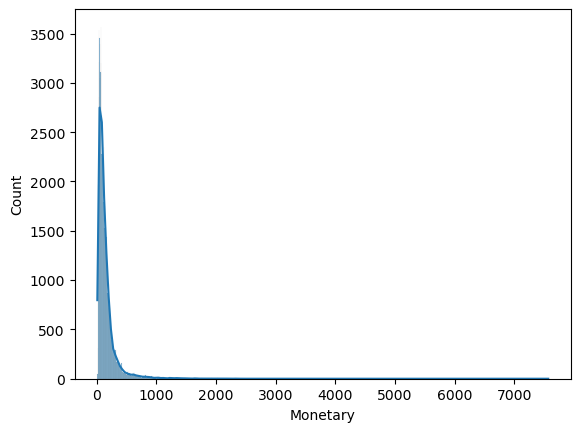

In [82]:
sns.histplot(data=RFM, x="Monetary", kde=True)

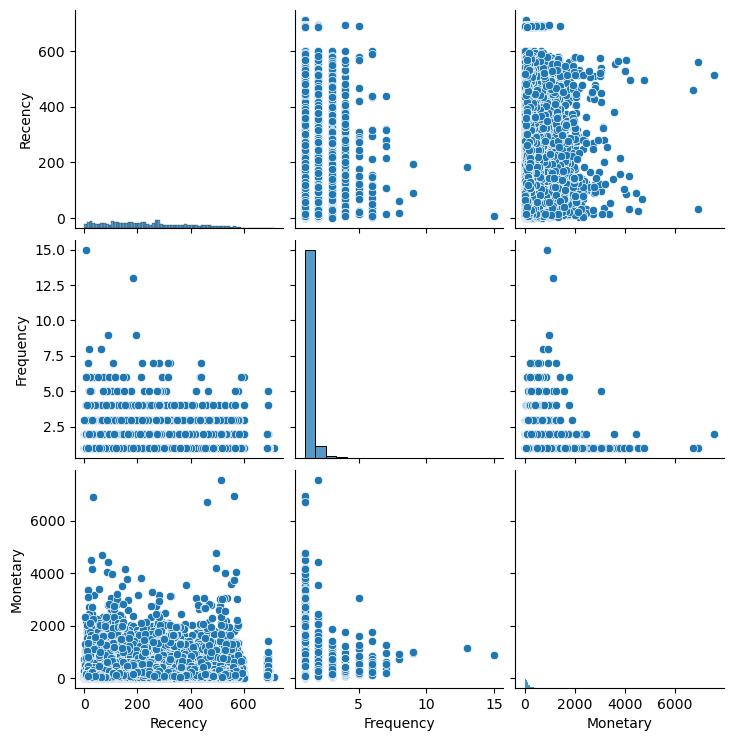

In [83]:
# Analyses bivariées

sns.pairplot(RFM)
plt.show()

In [84]:
# Détermination des corrélations entre les variables 

corr_spearman = round(RFM.corr(method='spearman'),2)
corr_spearman

,Recency,Frequency,Monetary
Recency,1.00,-0.01,-0.02
Frequency,-0.01,1.00,0.21
Monetary,-0.02,0.21,1.00


------------------------------------------------------------------------------------------


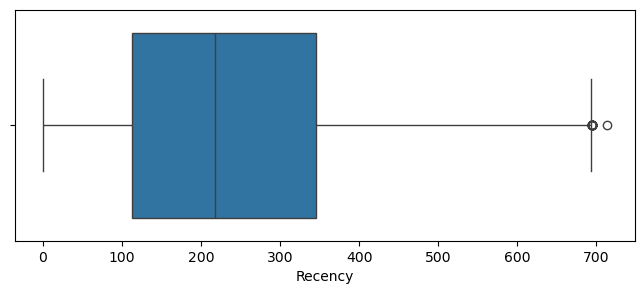

------------------------------------------------------------------------------------------


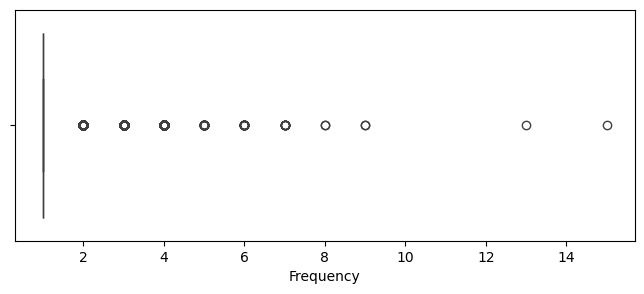

------------------------------------------------------------------------------------------


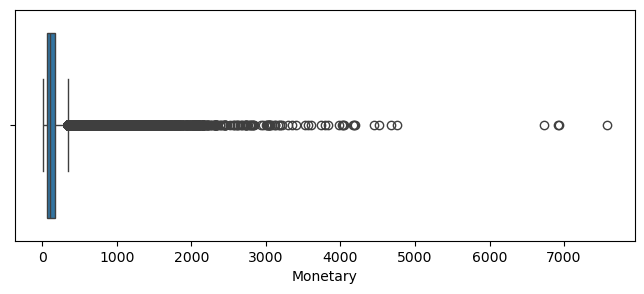

In [85]:
# Tracé des boxplots pour chaque variable pour visualiser les outliers

for column in RFM:
    fig, ax = plt.subplots(figsize=(8,3))
    sns.boxplot(x=RFM[column], ax=ax)
    print("-"*90)
    plt.show()

In [86]:
RFM.to_csv('rfm.csv')

# Détermination des autres features pertinents pour le modèle final

In [87]:
# Features liés aux dimensions des produits

## Le poids moyen des produits
weight_g = df.groupby(["customer_unique_id"])["product_weight_g"].mean()

## La longueur moyenne des produits
length_cm = df.groupby(["customer_unique_id"])["product_length_cm"].mean()

## La hauteur moyenne des produits 
heigth_cm = df.groupby(["customer_unique_id"])["product_height_cm"].mean()

## La largeur moyenne des produits
width_cm = df.groupby(["customer_unique_id"])["product_width_cm"].mean()

In [88]:
weight_g

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     1500.0
0000b849f77a49e4a4ce2b2a4ca5be3f      375.0
0000f46a3911fa3c0805444483337064     1500.0
0000f6ccb0745a6a4b88665a16c9f078      150.0
0004aac84e0df4da2b147fca70cf8255     6050.0
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    30000.0
fffea47cd6d3cc0a88bd621562a9d061     1720.0
ffff371b4d645b6ecea244b27531430a      600.0
ffff5962728ec6157033ef9805bacc48      444.0
ffffd2657e2aad2907e67c3e9daecbeb      400.0
Name: product_weight_g, Length: 93358, dtype: float64

In [89]:
length_cm

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    34.0
0000b849f77a49e4a4ce2b2a4ca5be3f    26.0
0000f46a3911fa3c0805444483337064    25.0
0000f6ccb0745a6a4b88665a16c9f078    19.0
0004aac84e0df4da2b147fca70cf8255    16.0
                                    ... 
fffcf5a5ff07b0908bd4e2dbc735a684    55.0
fffea47cd6d3cc0a88bd621562a9d061    33.0
ffff371b4d645b6ecea244b27531430a    17.0
ffff5962728ec6157033ef9805bacc48    20.0
ffffd2657e2aad2907e67c3e9daecbeb    18.0
Name: product_length_cm, Length: 93358, dtype: float64

In [90]:
heigth_cm

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     7.0
0000b849f77a49e4a4ce2b2a4ca5be3f    11.0
0000f46a3911fa3c0805444483337064    50.0
0000f6ccb0745a6a4b88665a16c9f078     5.0
0004aac84e0df4da2b147fca70cf8255     3.0
                                    ... 
fffcf5a5ff07b0908bd4e2dbc735a684    75.0
fffea47cd6d3cc0a88bd621562a9d061    36.0
ffff371b4d645b6ecea244b27531430a    15.0
ffff5962728ec6157033ef9805bacc48    14.0
ffffd2657e2aad2907e67c3e9daecbeb    11.0
Name: product_height_cm, Length: 93358, dtype: float64

In [91]:
width_cm

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    32.0
0000b849f77a49e4a4ce2b2a4ca5be3f    18.0
0000f46a3911fa3c0805444483337064    35.0
0000f6ccb0745a6a4b88665a16c9f078    11.0
0004aac84e0df4da2b147fca70cf8255    11.0
                                    ... 
fffcf5a5ff07b0908bd4e2dbc735a684    61.0
fffea47cd6d3cc0a88bd621562a9d061    27.0
ffff371b4d645b6ecea244b27531430a    13.0
ffff5962728ec6157033ef9805bacc48    16.0
ffffd2657e2aad2907e67c3e9daecbeb    11.0
Name: product_width_cm, Length: 93358, dtype: float64

In [92]:
# Feature lié à la prise en compte du montant du fret la valeur de la commande

## calcul du total des prix des commandes pour chaque client
total_price = df.groupby(["customer_unique_id"])["price"].sum()

## calcul du total des frets des commandes pour chaque client
total_freight = df.groupby(["customer_unique_id"])["freight_value"].sum()

## Regroupement des 2 variables dans un seul data frame
total_price_freight = pd.concat([total_price,total_freight], axis=1)

## Détermination du pourcentage de freight pour chaque client
total_price_freight["freight_percent"] = round((total_price_freight["freight_value"]/total_price_freight["price"]),2)
total_price_freight = total_price_freight.drop(columns=["price","freight_value"],axis=1)
total_price_freight

,freight_percent
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,0.09
0000b849f77a49e4a4ce2b2a4ca5be3f,0.44
0000f46a3911fa3c0805444483337064,0.25
0000f6ccb0745a6a4b88665a16c9f078,0.68
0004aac84e0df4da2b147fca70cf8255,0.09
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.32
fffea47cd6d3cc0a88bd621562a9d061,0.30
ffff371b4d645b6ecea244b27531430a,0.25


In [93]:
# Feature lié au score de revue attribué par le client selon son expérience d'achat et au type de paiement 
'''Pour ces features afin de rester pertinent dans l'analyse, nous choisissons de retenir pour chaque client la dernière note connue c'est à dire la note obtenue lors
de son dernier achat et le type de paiement qu'il a effectué durant cet achat'''

ForLastReview = df.loc[:,["customer_unique_id","order_purchase_timestamp","payment_type","review_score"]] # extraaction des informations nécessaires
ForLastReview

,customer_unique_id,order_purchase_timestamp,payment_type,review_score
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,credit_card,4.0
3,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,boleto,4.0
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,credit_card,5.0
5,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,credit_card,5.0
6,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,credit_card,5.0
...,...,...,...,...
119137,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,credit_card,5.0
119138,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,credit_card,4.0
119139,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,credit_card,5.0
119140,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,credit_card,2.0


In [94]:
ForLastReview.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'], inplace=True) # Nous trions par client et date d'achat

LastReview = ForLastReview.groupby('customer_unique_id').last().reset_index() # Nous retenons la dernière occurrence pour chaque client

LastReview.set_index("customer_unique_id", inplace=True) # Nous reattribuons "customer_unique_id" comme index

LastReview = LastReview.drop(columns=["order_purchase_timestamp"], axis=1) # Nous supprimons la colonne order_purchase_timestamp qui n'est pas importante

LastReview

,payment_type,review_score
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,credit_card,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,4.0
0000f46a3911fa3c0805444483337064,credit_card,3.0
0000f6ccb0745a6a4b88665a16c9f078,credit_card,4.0
0004aac84e0df4da2b147fca70cf8255,credit_card,5.0
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,credit_card,5.0
fffea47cd6d3cc0a88bd621562a9d061,credit_card,4.0
ffff371b4d645b6ecea244b27531430a,credit_card,5.0


In [95]:
# Récapitulatif des features temporels

delivery_time_days = df.groupby(["customer_unique_id"])["delivery_time_days"].mean()
delivery_time_days                                                       

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     6.41
0000b849f77a49e4a4ce2b2a4ca5be3f     3.29
0000f46a3911fa3c0805444483337064    25.73
0000f6ccb0745a6a4b88665a16c9f078    20.04
0004aac84e0df4da2b147fca70cf8255    13.14
                                    ...  
fffcf5a5ff07b0908bd4e2dbc735a684    27.51
fffea47cd6d3cc0a88bd621562a9d061    30.10
ffff371b4d645b6ecea244b27531430a    14.87
ffff5962728ec6157033ef9805bacc48    11.86
ffffd2657e2aad2907e67c3e9daecbeb     7.55
Name: delivery_time_days, Length: 93358, dtype: float64

In [96]:
carrier_delay_days = df.groupby(["customer_unique_id"])["carrier_delay_days"].mean()
carrier_delay_days

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     1.88
0000b849f77a49e4a4ce2b2a4ca5be3f     1.74
0000f46a3911fa3c0805444483337064     2.66
0000f6ccb0745a6a4b88665a16c9f078     0.97
0004aac84e0df4da2b147fca70cf8255     1.99
                                    ...  
fffcf5a5ff07b0908bd4e2dbc735a684    14.66
fffea47cd6d3cc0a88bd621562a9d061    10.84
ffff371b4d645b6ecea244b27531430a     0.75
ffff5962728ec6157033ef9805bacc48     1.03
ffffd2657e2aad2907e67c3e9daecbeb     0.87
Name: carrier_delay_days, Length: 93358, dtype: float64

In [97]:
approval_delay_days = df.groupby(["customer_unique_id"])["approval_delay_days"].mean()
approval_delay_days

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    0.01
0000b849f77a49e4a4ce2b2a4ca5be3f    0.30
0000f46a3911fa3c0805444483337064    0.00
0000f6ccb0745a6a4b88665a16c9f078    0.01
0004aac84e0df4da2b147fca70cf8255    0.01
                                    ... 
fffcf5a5ff07b0908bd4e2dbc735a684    0.01
fffea47cd6d3cc0a88bd621562a9d061    0.01
ffff371b4d645b6ecea244b27531430a    0.01
ffff5962728ec6157033ef9805bacc48    0.03
ffffd2657e2aad2907e67c3e9daecbeb    0.79
Name: approval_delay_days, Length: 93358, dtype: float64

In [98]:
# Feature lié à la taille de la ville (Le client est-il situé dans une grande ville ou une petite ville?)

city = df.loc[:,["customer_unique_id","customer_city"]] # Extraction des informations sur la ville des clients
city

,customer_unique_id,customer_city
0,7c396fd4830fd04220f754e42b4e5bff,sao paulo
3,af07308b275d755c9edb36a90c618231,barreiras
4,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis
5,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante
6,72632f0f9dd73dfee390c9b22eb56dd6,santo andre
...,...,...
119137,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos
119138,da62f9e57a76d978d02ab5362c509660,praia grande
119139,737520a9aad80b3fbbdad19b66b37b30,nova vicosa
119140,5097a5312c8b157bb7be58ae360ef43c,japuiba


In [99]:
city.sort_values(by=['customer_unique_id','customer_city'], inplace=True) # Nous classons les clients
city = city.groupby('customer_unique_id').last().reset_index() # Nous retenons la dernière occurrence pour chaque client
city.set_index("customer_unique_id", inplace=True) # Nous reattribuons "customer_unique_id" comme index. Nous avons ainsi une ville unique pour chaque client.
city

,customer_city
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco
0000f46a3911fa3c0805444483337064,sao jose
0000f6ccb0745a6a4b88665a16c9f078,belem
0004aac84e0df4da2b147fca70cf8255,sorocaba
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,sanharo
fffea47cd6d3cc0a88bd621562a9d061,feira de santana
ffff371b4d645b6ecea244b27531430a,sinop


In [100]:
# Attribuons à chaque client son type d'agglomération (grande ou petite)

large_city =["sao paulo","rio de janeiro","brasilia","salvador"] # Identification des grandes agglomérations du Brésil

# Nous créons une fonction qui nous permettra d'affecter à chaque ville sa caractéristique.
def replace(row):
    if row in large_city:
        return "large city"
    else:
        return "small city"

In [101]:
city['city_type'] = city['customer_city'].apply(replace) # Nous appliquons la fonction à l'ensemble des villes des clients.
city

,customer_city,city_type
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,small city
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,small city
0000f46a3911fa3c0805444483337064,sao jose,small city
0000f6ccb0745a6a4b88665a16c9f078,belem,small city
0004aac84e0df4da2b147fca70cf8255,sorocaba,small city
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,small city
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,small city
ffff371b4d645b6ecea244b27531430a,sinop,small city


In [102]:
# Supprimons la colonne "customer_city"
city = city.drop(columns=["customer_city"],axis=1)

In [103]:
# Regroupons l'ensemble des features dans un seul data frame

finalData = pd.concat([RFM, total_price_freight, weight_g, length_cm, heigth_cm,
                       width_cm, delivery_time_days, carrier_delay_days,
                       approval_delay_days, LastReview, city ], axis=1)

In [104]:
mean_delivery = finalData["delivery_time_days"].mean()
mean_carrier = finalData["carrier_delay_days"].mean()
mean_approval = finalData["approval_delay_days"].mean()

finalData["delivery_time_days"].fillna(mean_delivery, inplace=True)
finalData["carrier_delay_days"].fillna(mean_carrier, inplace=True)
finalData["approval_delay_days"].fillna(mean_approval, inplace=True)

In [105]:
med_score = finalData["review_score"].median()

finalData["review_score"].fillna(med_score, inplace=True)

In [106]:
# Tableau des valeurs manquantes par variables après fusion

missing_values = finalData.isnull().sum()
missing_percent = round((missing_values/len(finalData))*100,3)
missing_table = pd.DataFrame({"Missing Values":missing_values,"Percentage":missing_percent})
print(missing_table)

                     Missing Values  Percentage
Recency                           0         0.0
Frequency                         0         0.0
Monetary                          0         0.0
freight_percent                   0         0.0
product_weight_g                  0         0.0
product_length_cm                 0         0.0
product_height_cm                 0         0.0
product_width_cm                  0         0.0
delivery_time_days                0         0.0
carrier_delay_days                0         0.0
approval_delay_days               0         0.0
payment_type                      0         0.0
review_score                      0         0.0
city_type                         0         0.0


In [107]:
# Visualisation globale du data frame finalData
finalData.reset_index()

,customer_unique_id,Recency,Frequency,Monetary,freight_percent,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivery_time_days,carrier_delay_days,approval_delay_days,payment_type,review_score,city_type
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0.09,1500.0,34.0,7.0,32.0,6.41,1.88,0.01,credit_card,5.0,small city
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0.44,375.0,26.0,11.0,18.0,3.29,1.74,0.30,credit_card,4.0,small city
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0.25,1500.0,25.0,50.0,35.0,25.73,2.66,0.00,credit_card,3.0,small city
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0.68,150.0,19.0,5.0,11.0,20.04,0.97,0.01,credit_card,4.0,small city
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0.09,6050.0,16.0,3.0,11.0,13.14,1.99,0.01,credit_card,5.0,small city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,2067.42,0.32,30000.0,55.0,75.0,61.0,27.51,14.66,0.01,credit_card,5.0,small city
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,0.30,1720.0,33.0,36.0,27.0,30.10,10.84,0.01,credit_card,4.0,small city
93355,ffff371b4d645b6ecea244b27531430a,567,1,112.46,0.25,600.0,17.0,15.0,13.0,14.87,0.75,0.01,credit_card,5.0,small city
93356,ffff5962728ec6157033ef9805bacc48,118,1,133.69,0.16,444.0,20.0,14.0,16.0,11.86,1.03,0.03,credit_card,5.0,small city


In [108]:
# Encodage des varaible catégorielles payment_type et city_type

from sklearn.preprocessing import OneHotEncoder

data_for_encoding = finalData.loc[:,['payment_type','city_type']]

ohe = OneHotEncoder(sparse_output=False, drop='first') # Nous supprimons la première modamlité pour éviter la collinéarité
ohe_result = ohe.fit_transform(data_for_encoding[['payment_type','city_type']])
data_for_encoding_ohe = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['payment_type','city_type']))
print("One-hot encoding : ")
display(data_for_encoding_ohe)

One-hot encoding : 


,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,city_type_small city
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
93353,1.0,0.0,0.0,1.0
93354,1.0,0.0,0.0,1.0
93355,1.0,0.0,0.0,1.0
93356,1.0,0.0,0.0,1.0


In [109]:
# Suppression des variables encodées

finalData = finalData.drop(["payment_type","city_type"],axis=1).reset_index()



In [110]:
# Regroupement de l'ensemble des données dans une seule dataframe

finalData = pd.concat([finalData,data_for_encoding_ohe],axis=1)


In [111]:
# Utilisons 'customer_unique_id' comme index

finalData.set_index("customer_unique_id", inplace=True)

In [112]:
finalData

,Recency,Frequency,Monetary,freight_percent,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivery_time_days,carrier_delay_days,approval_delay_days,review_score,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,city_type_small city
customer_unique_id,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0.09,1500.0,34.0,7.0,32.0,6.41,1.88,0.01,5.0,1.0,0.0,0.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0.44,375.0,26.0,11.0,18.0,3.29,1.74,0.30,4.0,1.0,0.0,0.0,1.0
0000f46a3911fa3c0805444483337064,536,1,86.22,0.25,1500.0,25.0,50.0,35.0,25.73,2.66,0.00,3.0,1.0,0.0,0.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0.68,150.0,19.0,5.0,11.0,20.04,0.97,0.01,4.0,1.0,0.0,0.0,1.0
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0.09,6050.0,16.0,3.0,11.0,13.14,1.99,0.01,5.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,2067.42,0.32,30000.0,55.0,75.0,61.0,27.51,14.66,0.01,5.0,1.0,0.0,0.0,1.0
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,0.30,1720.0,33.0,36.0,27.0,30.10,10.84,0.01,4.0,1.0,0.0,0.0,1.0
ffff371b4d645b6ecea244b27531430a,567,1,112.46,0.25,600.0,17.0,15.0,13.0,14.87,0.75,0.01,5.0,1.0,0.0,0.0,1.0


# Réalisons une analyse exploratoire rapide de finalData

In [113]:
## Vue globale des caractéristiques essentielles 

finalData.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,93358.0,236.941773,152.591453,0.00,113.00,218.000,345.00,713.00
Frequency,93358.0,1.073245,0.328448,1.00,1.00,1.000,1.00,15.00
Monetary,93358.0,154.354920,206.382393,9.59,59.78,101.635,171.84,7571.63
freight_percent,93358.0,0.306042,0.308470,0.00,0.13,0.220,0.38,21.45
product_weight_g,93358.0,2103.163116,3730.334308,0.00,300.00,700.000,1825.00,40425.00
product_length_cm,93358.0,30.076451,15.955291,7.00,18.00,25.000,38.00,105.00
product_height_cm,93358.0,16.478704,13.215068,2.00,8.00,13.000,20.00,105.00
product_width_cm,93358.0,23.000520,11.619161,6.00,15.00,20.000,30.00,118.00
delivery_time_days,93358.0,12.566862,9.546349,0.53,6.79,10.230,15.72,209.63
carrier_delay_days,93358.0,2.795339,3.520171,-171.22,0.88,1.820,3.57,125.76


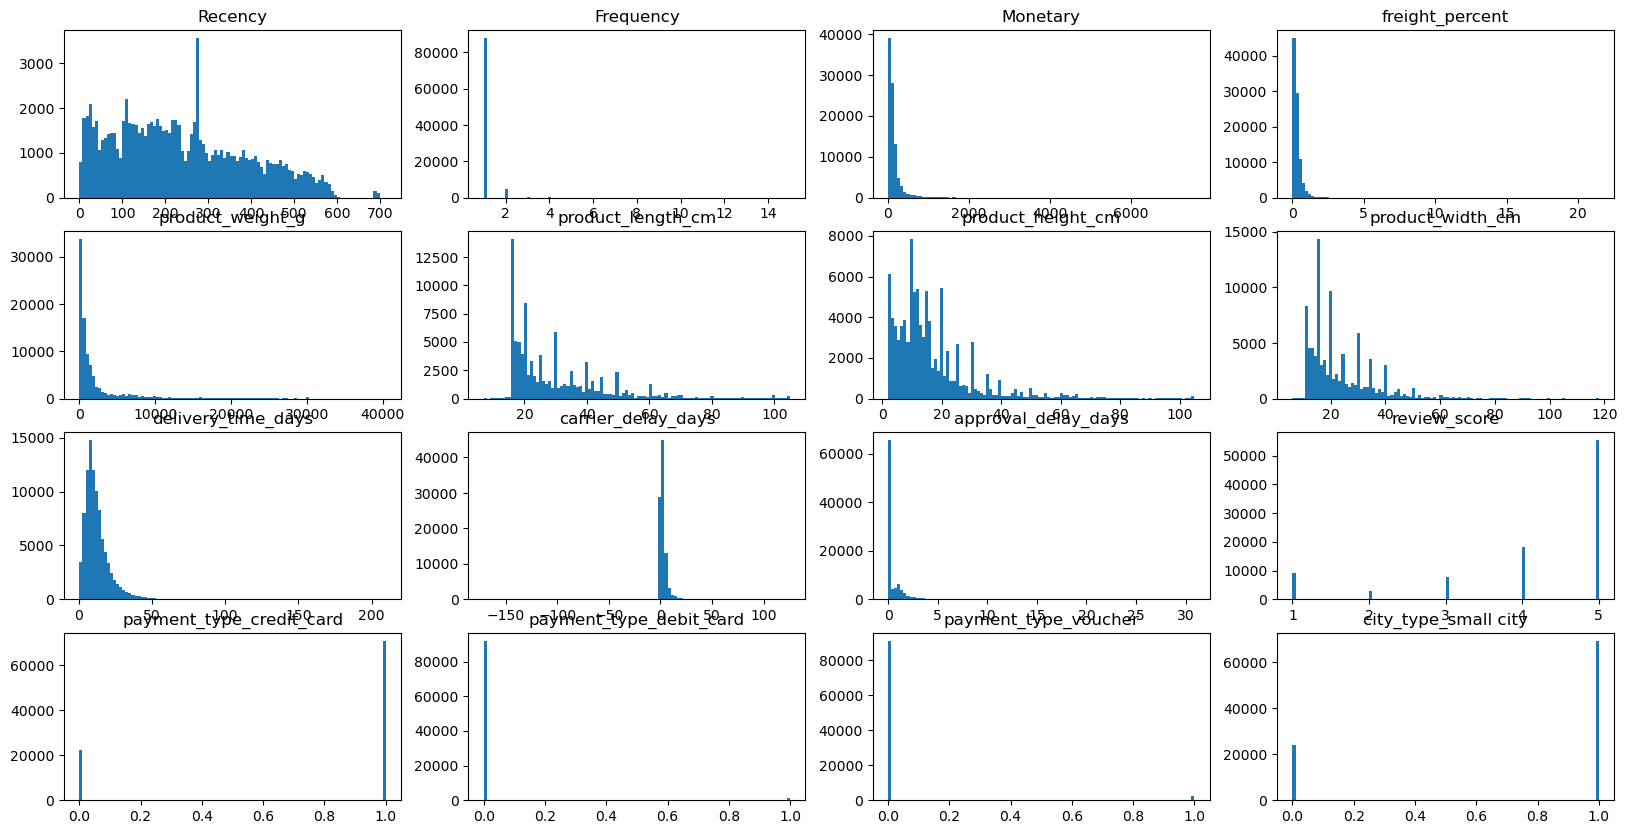

In [114]:
## Visualisation de la distribution des variables
fig, axs = plt.subplots(4,4,figsize=(20,10))
axs = axs.ravel()

for i, column in enumerate(finalData.columns):
    axs[i].hist(finalData[column], bins=100)
    axs[i].set_title(column)
plt.show()

------------------------------------------------------------------------------------------


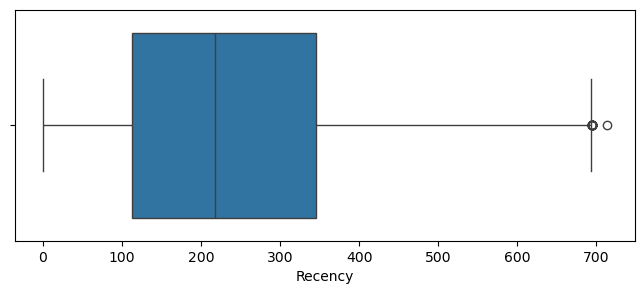

------------------------------------------------------------------------------------------


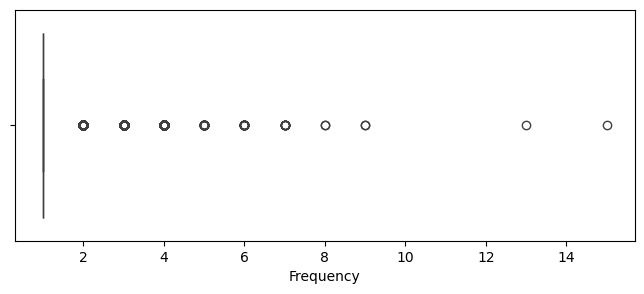

------------------------------------------------------------------------------------------


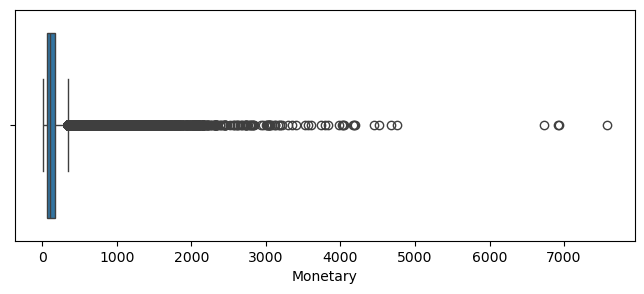

------------------------------------------------------------------------------------------


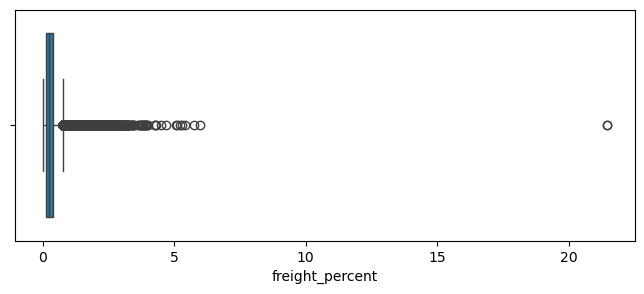

------------------------------------------------------------------------------------------


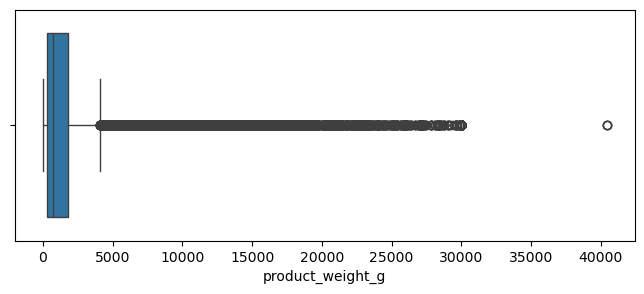

------------------------------------------------------------------------------------------


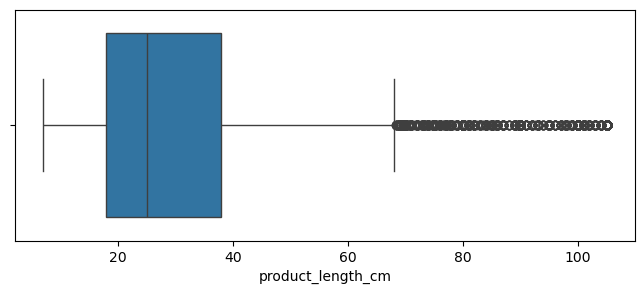

------------------------------------------------------------------------------------------


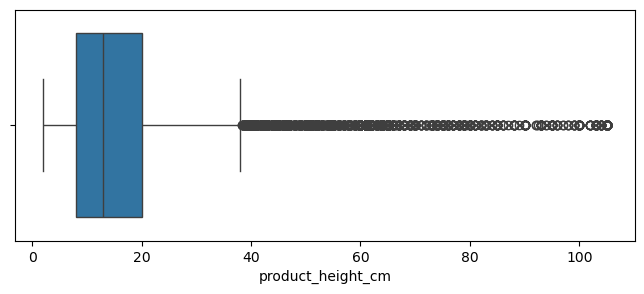

------------------------------------------------------------------------------------------


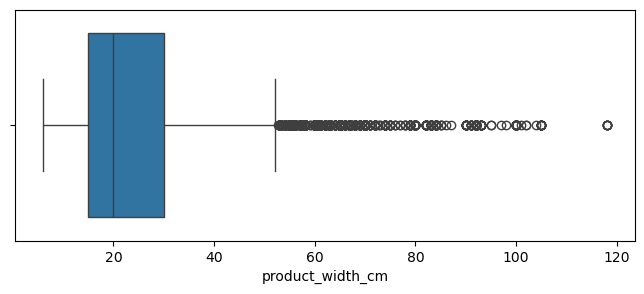

------------------------------------------------------------------------------------------


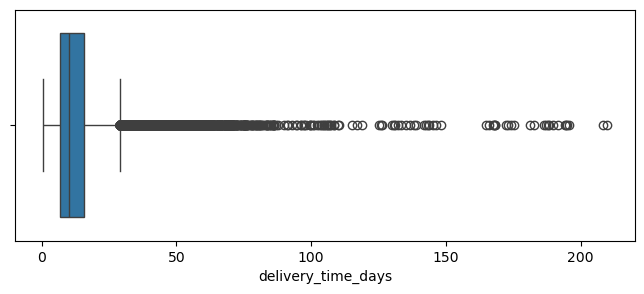

------------------------------------------------------------------------------------------


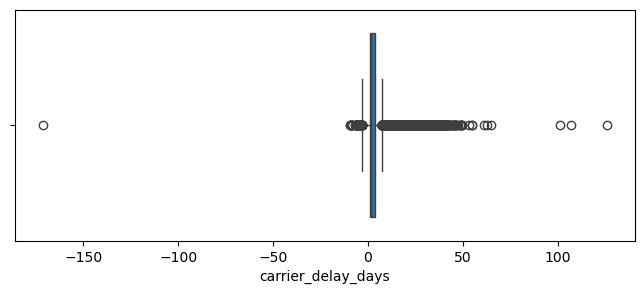

------------------------------------------------------------------------------------------


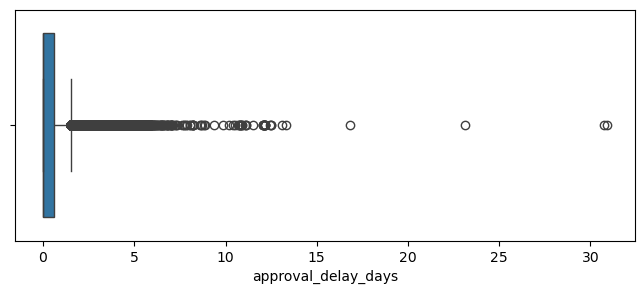

------------------------------------------------------------------------------------------


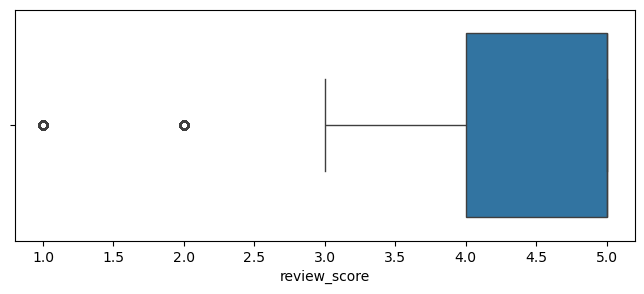

------------------------------------------------------------------------------------------


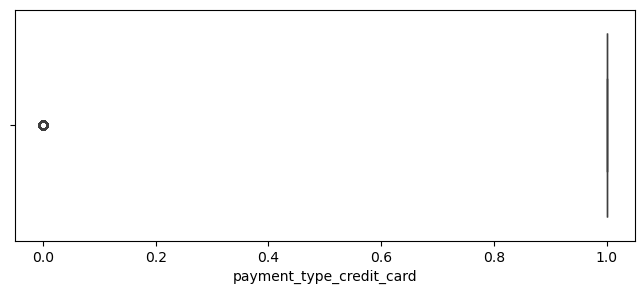

------------------------------------------------------------------------------------------


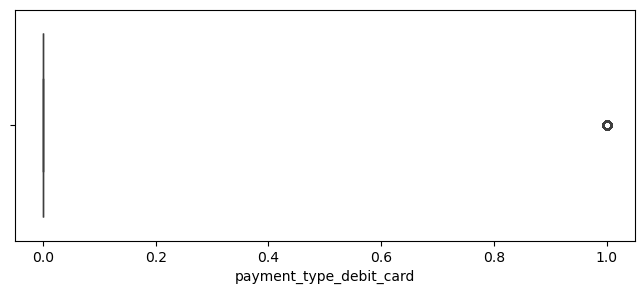

------------------------------------------------------------------------------------------


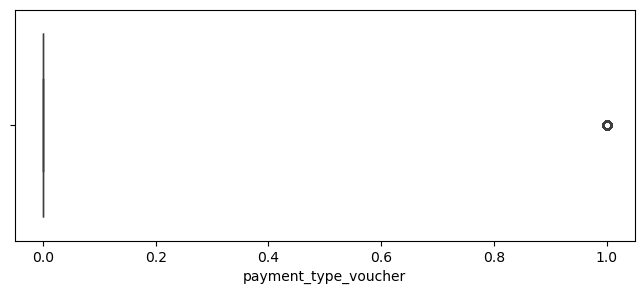

------------------------------------------------------------------------------------------


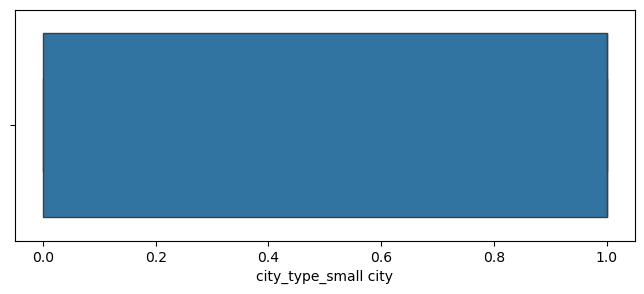

In [115]:
# Tracé des boxplots pour chaque variable pour visualiser les outliers

for column in finalData:
    fig, ax = plt.subplots(figsize=(8,3))
    sns.boxplot(x=finalData[column], ax=ax)
    print("-"*90)
    plt.show()

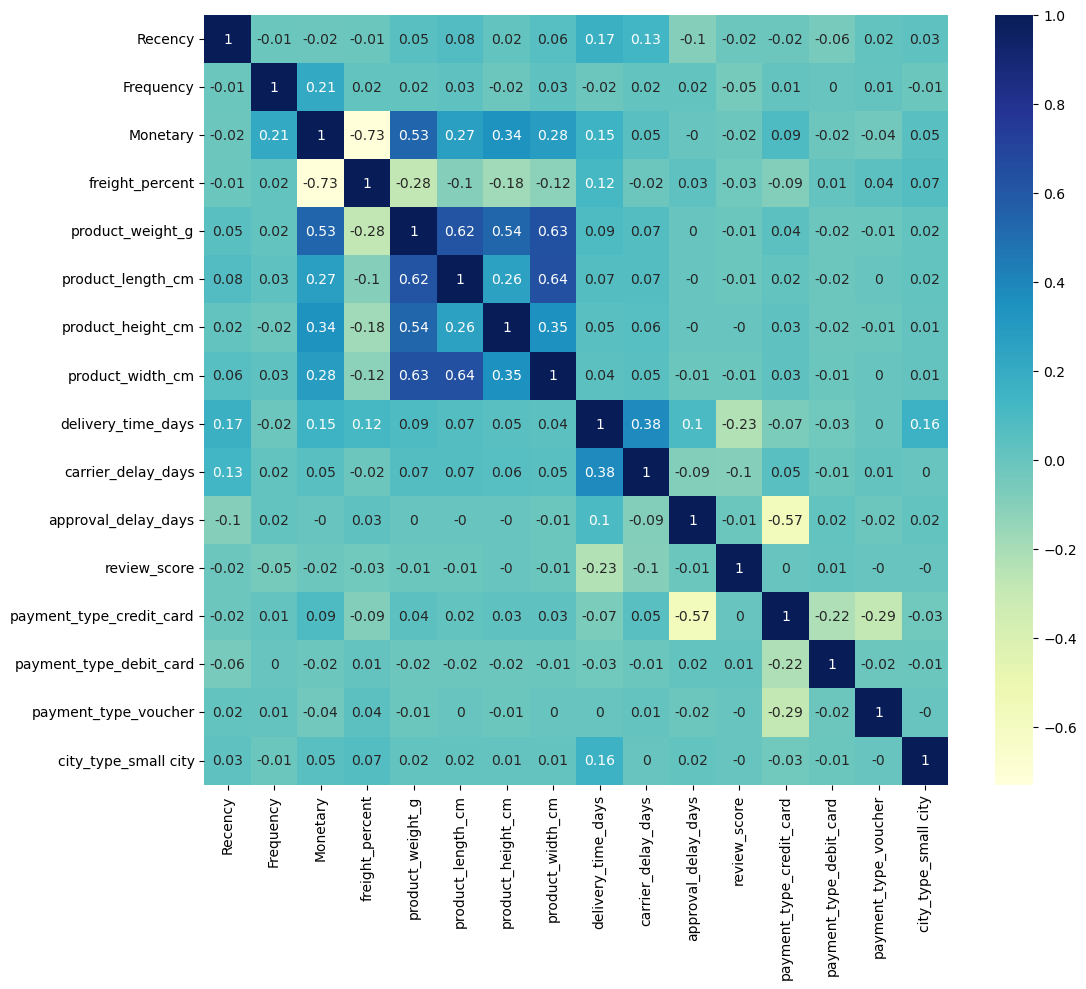

In [116]:
## Observons les corrélations entre les variables

corr_matrix = round(finalData.corr(method='spearman'),2)
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

'''Observations:
- Les corrélations entre les variables ne montrent pas de variables très fortement correlées pouvant entraîner une multicollinéarité.
- Nous avons une fortement corrélation négative -0.73 entre le montant des commandes des clients et le pourcentage des frais de transport attachés.
- Nous avons une bonne corrélation positive de 0.53 entre le montant des commandes et le poids des articles concernés.
- Il  ya une forte corrélation positive entre les variables représentant les dimensions des articles achetés (poids , longueur, largeur et hauteur) entre 0.54 et 0.64
- Nous observons une bonne corrélation négative entre les paiements effectués par carte de crédit et le délai d'approbation des commandes.'''

In [117]:
## Renommons les colonnes afin d'avoir des noms plus courts pour faciliter la présentation des schémas

finalData = finalData.rename(columns = {'Recency':'recency', 'Frequency':'frequency', 'Monetary':'monetary', 'freight_percent':'freight', 'product_weight_g':'weight',
                            'product_length_cm':'length', 'product_height_cm':'height', 'product_width_cm':'width', 'delivery_time_days':'delivery_delay',
                            'carrier_delay_days':'carrier_delay', 'approval_delay_days':'approval_delay', 'review_score':'score', 'payment_type_credit_card':'credit_card',
                            'payment_type_debit_card':'debit_card', 'payment_type_voucher':'voucher', 'city_type_small city':'small_city'})

In [118]:
## Extraction des données de finalData afin de les utiliser dans le notebook de modélisation final.

finalData.to_csv('finalData.csv')

In [119]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         93358 non-null  int64  
 1   frequency       93358 non-null  int64  
 2   monetary        93358 non-null  float64
 3   freight         93358 non-null  float64
 4   weight          93358 non-null  float64
 5   length          93358 non-null  float64
 6   height          93358 non-null  float64
 7   width           93358 non-null  float64
 8   delivery_delay  93358 non-null  float64
 9   carrier_delay   93358 non-null  float64
 10  approval_delay  93358 non-null  float64
 11  score           93358 non-null  float64
 12  credit_card     93358 non-null  float64
 13  debit_card      93358 non-null  float64
 14  voucher         93358 non-null  float64
 15  small_city      93358 non-null  float64
dtypes: float64(14), int64(2